# Feixes da Corneta

## Inicialização

## Visualização das Fases

![geom](../Figuras/phase_center_geometry.png)

ref: 
> Prata, A. "Misaligned antenna phase-center determination using measured phase patterns." IPN Progress Report (2002): 42-150.

$$R' = \Delta_x\hat i + \Delta_y\hat j + \Delta_z\hat k\\
R_I = \delta_x\hat i + \delta_y\hat j\\
\Phi(\theta, \phi) = -k_0\lvert \vec R - \vec R´\rvert + F(\theta, \phi)\\
\Phi(\theta, \phi) \approx -k_0\left[R - \Delta_x \sin\phi\;\sin\theta - \Delta_y \cos \phi\;\sin\theta - \Delta_z \cos\theta \right] + F(\theta, \phi) \\
\Phi(\theta, \phi) \approx k_0\left[\Delta_x \sin\phi\;\sin\theta + \Delta_y \cos \phi\;\sin\theta + \Delta_z \cos\theta \right] + \phi_0
$$
Como $\phi \in \{0, \pi/2 \}$ podemos escrever:
$$
\tilde \Phi = \tilde \Delta_{XY} \sin \theta + \tilde \Delta_Z \cos\theta,
$$
absorvendo o número de onda nos parâmetros de posição do centro de fase e considerando a diferença de fase medida em um dado ângulo $\theta$ com a fase com o ângulo de maior intensidade do feixe. Este procedimento é indicado como "angle corrected". Nos ajustes sem esta correção, as fases foram consideradas no ângulo $\theta=0$.

Problema de minimização:
$$
\mathcal{L}(\Delta_{XY}, \Delta_z, \hat \Phi_i) = \frac{1}{\sum_{i=1}^{N} w_i}\sum_{i=1}^{N} (\hat \Phi_i - \tilde \Phi(\Delta_xy, \Delta_z)) \\
\mathcal{L}: [0, 2]\times [0, 2] \times [-\pi, \pi] \mapsto [-\pi, \pi] \\
\{\bar \Delta_{xy}, \bar \Delta_{z} \} = \mathrm{argmin}\; \mathcal{L}
$$

Os esquemas de pesos utilizados foram:
$$
w = 1 \\
w = 10^{\frac{P_{dB}}{10}}
$$

**Preparação dos dados**

1. Carrega dados de polarização horizonta e vertical em dataframe
2. Normaliza Amplitudes para máximo em 0 dB
3. Converte ângulos de rotação em radianos
4. Converte medidas de fase em radianos
5. Normaliza medidas de fase com subtração do valor da fase correspondente ao ângulo de máxima amplitude

**Investigação**
1. Comportamento do resíduo para diferentes esquemas de ponderação
2. Comportamento do resíduo para diferentes valores de ângulo máximo

- **Eixo z**: No eixo de simetria da antena, conectando dispositivo a antena iluminante.
- **Eixo x**: Vertical
- **Eixo y**: Vorizontal
- **$\phi$**: Em torno de $z$
- **$\theta$**: Em torno de $x$ 

|Vorizontal copolar | $-180^\circ \le \theta \le 180^\circ$       |  $\phi = 90^\circ$   |
|-----------------|----------------------------------------------|--------------------|
|Vertical copolar |   $-180^\circ \le \theta \le 180^\circ$       |    $\phi = 0^\circ$   |


## Determinação de Centro de Fase

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import phasecenter as pc

In [2]:
freqs = pc.get_freqs()
params = pc.get_phase_center(smooth=False)

<Axes: xlabel='Frequency (GHz)', ylabel='Phase Center (cm)'>

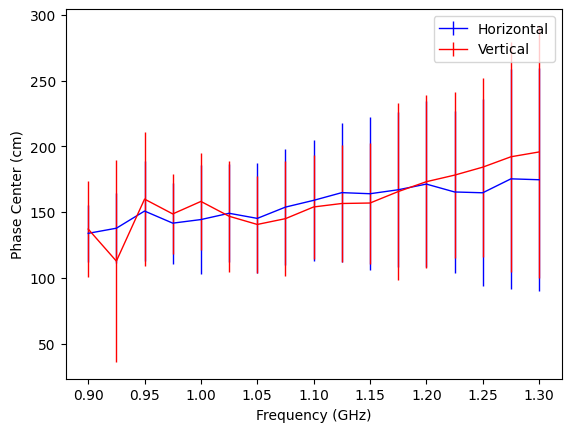

In [3]:
pc.plot_phase_center(params)

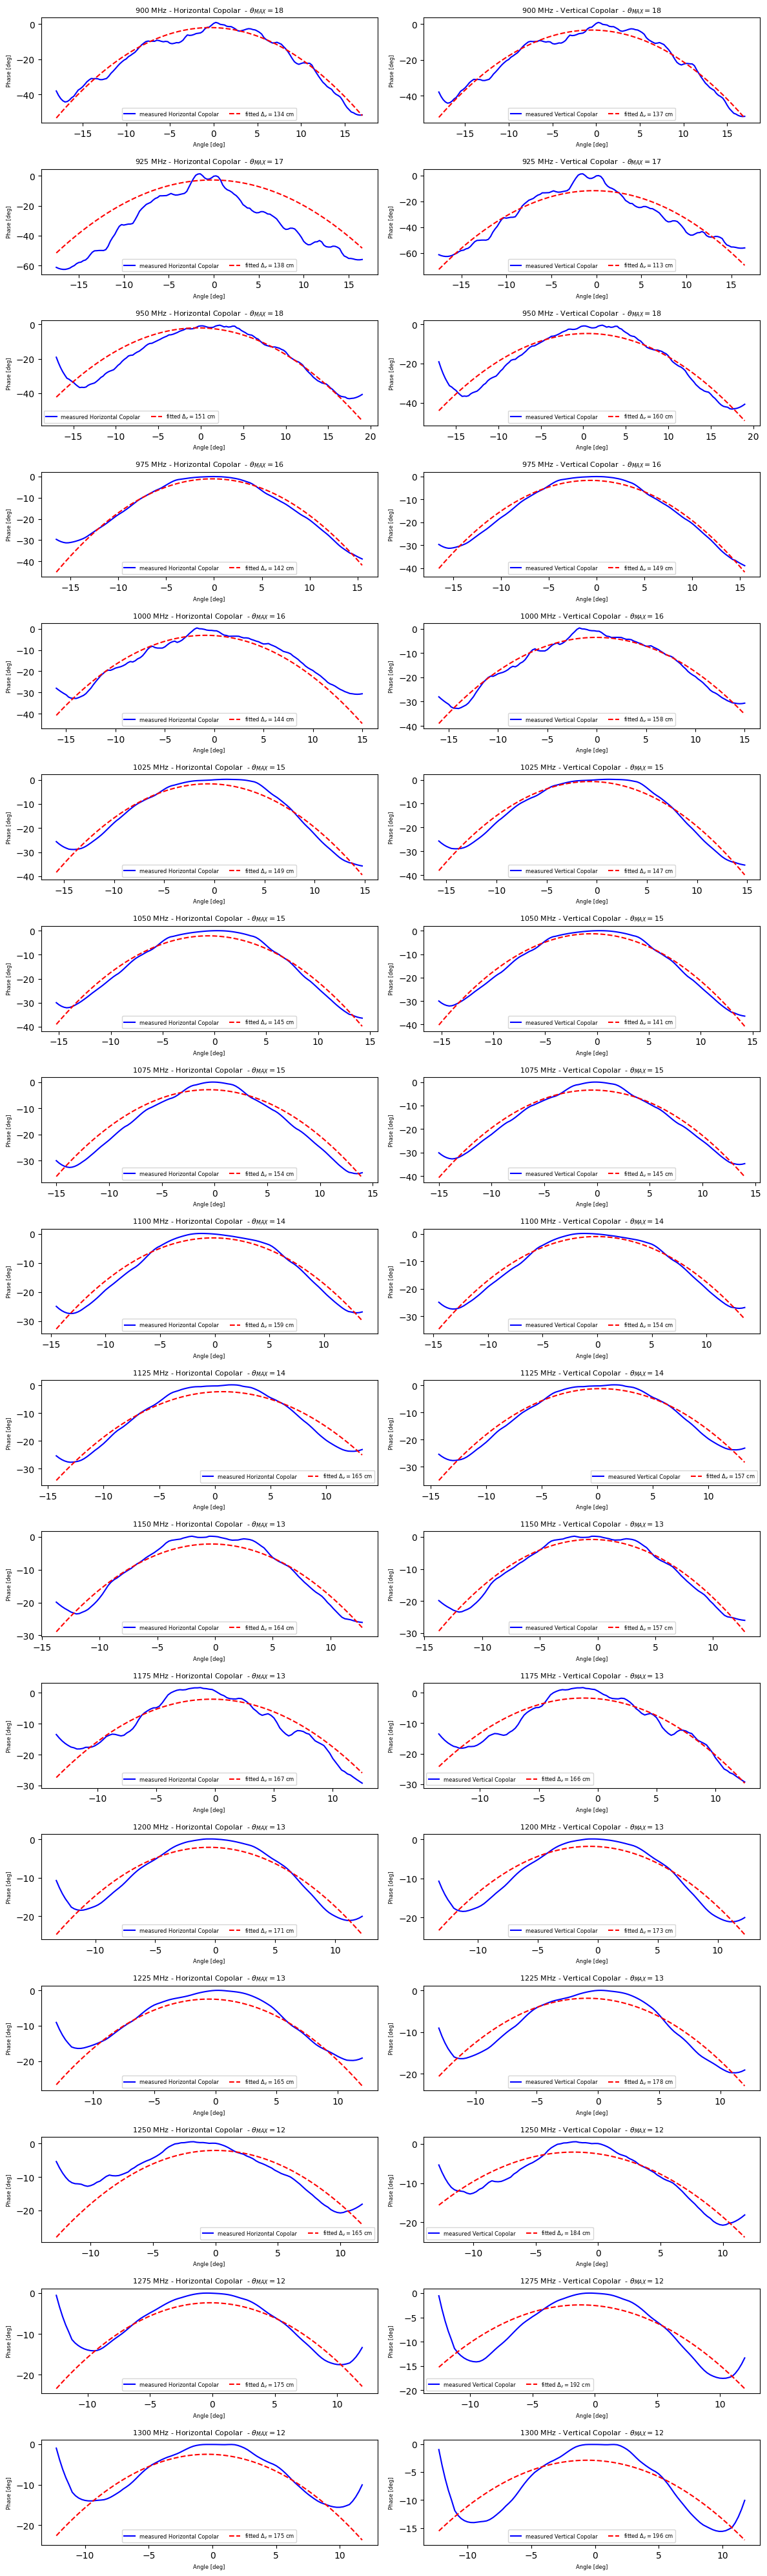

In [4]:
fig, ax = plt.subplots(ncols=2, nrows=len(freqs), figsize=(12, 40))
for ii, pars in enumerate(params[0][1]):
    pc.plot_phases(freqs[ii], pars[0:3], label="Horizontal Copolar", ax=ax[ii, 0])
for ii, pars in enumerate(params[0][2]):
    pc.plot_phases(freqs[ii], pars[0:3], label="Vertical Copolar", ax=ax[ii, 1])
plt.tight_layout();